# Project: Weather Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 ## Introduction 
 
 This is a weather dataset about a specific loctaion.It records temperature , humidity , wind speed and somemore weather specifications.
 
The purpose of this analysis is to answer some questions

1)Which Month is the most foggiest

2)What is the common weather of January

In [260]:
#Here Iam importing the libraries Iam going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

In the Data Wrangling section Iam going to:

1)load data

2)Inspect of duplicates

3)Inspect of missing data

In [261]:
#Here I loaded my data into a variable named df
df=pd.read_csv(r"C:\Users\Karim\Desktop\My Learnings\Data_Analysis_projects\Weather Data\Weather Data.csv")

df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [262]:
#Here Iam going to get information on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [263]:
#Here Iam going to check for duplicate rows
#If answer = zero means there is no duplicate rows
sum(df.duplicated())

0

In [264]:
#Here Iam going to check for null values in my dataset
#If answer is equal to zero means that there is no null values in my datadrame
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [265]:
#Here Iam going to get shape of my dataframe 
df.shape

(8784, 8)

In [266]:
#Here is a description of my data
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000



# Data Cleaning
#### 1)I will remove duplicates if there is 
#### 2) Make the Date/Time column to date_time data type
#### 3) Rename columns to be more clear

In [267]:
#Here I deleted the Duplicated Rows
df.drop_duplicates(inplace=True)
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [268]:
#Here I changed the type of Date/Time from string to datetime type
df['Date/Time']=pd.to_datetime(df['Date/Time'])
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [269]:
#Here I renamed some of Columns names for better understanding
df.rename(columns={'Rel Hum_%': 'Relative_Humidity_percentage','Press_kPa':'Pressure_kPa'},inplace=True)
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Relative_Humidity_percentage,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Exploratory Data Analysis
In EDA I Will plot 2 figures

1)Months that have foggy weather


2)All Weather Conditions in January


In [270]:
#Here I made a new column named "Months"
df['Months']=df['Date/Time'].dt.month
#Here I replaced the Months Number by their Strings
df['Months'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July',
                                                   'August','September','October','November','December'],inplace=True)
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Relative_Humidity_percentage,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather,Months
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,January
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",January
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",January
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,January


In [271]:
#Here I copied the dataframe to another variable to prevent changing of original dataframe incase of further use
tt=df.copy()
#Here I filtered the datafarme to only view all the rows where it contain the word 'Fog'
tt=tt[tt['Weather'].str.contains("Fog",na=False)]

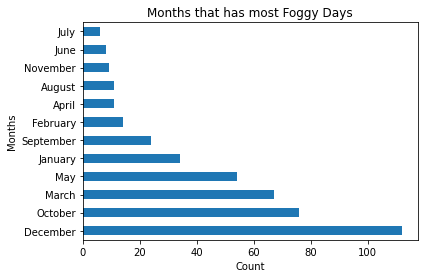

In [272]:
#Here I plotted the Months with how many fog days each present
#I also used barh as it is easier to read from it rather than bar chart
tt['Months'].value_counts().plot(kind='barh');
plt.xlabel("Count");
plt.ylabel("Months");
plt.title("Months that has most Foggy Days");

In [273]:
#Here I copied the DataFrame into another one to avoid changing in the real dataframe
dd=df.copy()
#Here I filtered the to only view the January Month
dd=dd[dd['Months']=='January']

In [274]:
#Here split the weather into list , then explode the list into rows
dd=dd.assign(Weather=df['Weather'].str.split(',')).explode('Weather')
dd

,Date/Time,Temp_C,Dew Point Temp_C,Relative_Humidity_percentage,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather,Months
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,January
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,Freezing Drizzle,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,Fog,January
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,Freezing Drizzle,January
...,...,...,...,...,...,...,...,...,...
740,2012-01-31 20:00:00,-7.4,-10.7,77,20,1.6,101.09,Snow,January
741,2012-01-31 21:00:00,-7.1,-10.5,77,20,12.9,101.02,Cloudy,January
742,2012-01-31 22:00:00,-7.1,-10.4,77,19,9.7,100.95,Snow,January
743,2012-01-31 23:00:00,-6.8,-9.9,79,22,9.7,100.86,Freezing Drizzle,January


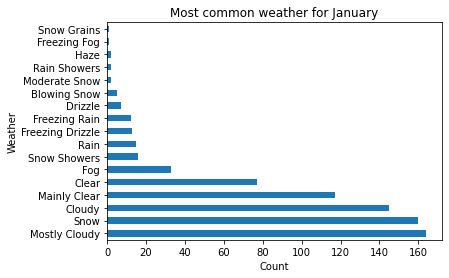

In [275]:
#Here its a barh chart that indicates what is the most common weather that January usually has
#Also I used barh chart as it is easy to understand
dd['Weather'].value_counts().plot(kind='barh');
plt.xlabel("Count");
plt.ylabel('Weather');
plt.title("Most common weather for January");